### Step 0
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [3]:
energy = pd.read_excel('data/Energy Indicators.xls', skiprows = 17)

In [3]:
energy.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Petajoules,Gigajoules,%
0,NaN,Afghanistan,Afghanistan,321,10,78.669280
1,NaN,Albania,Albania,102,35,100.000000
2,NaN,Algeria,Algeria,1959,51,0.551010
3,NaN,American Samoa,American Samoa,...,...,0.641026
4,NaN,Andorra,Andorra,9,121,88.695650


In [4]:
energy.tail(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Petajoules,Gigajoules,%
263,NaN,The data are compiled primarily from the annua...,NaN,NaN,NaN,NaN
264,NaN,"For more information, visit http://unstats.un....",NaN,NaN,NaN,NaN


In [4]:
#drop footers: footers start at row 248. Line 246 and line 247 are empty, and the First 17 rows are Headers, 
#so we subtract: 248 - (18 -3).>> 17-1 =18, because it's exlusive
energy = energy [:248-21]


In [5]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  227 non-null    object 
 2   Unnamed: 2  227 non-null    object 
 3   Petajoules  227 non-null    object 
 4   Gigajoules  227 non-null    object 
 5   %           227 non-null    float64
dtypes: float64(2), object(4)
memory usage: 10.8+ KB


In [6]:
#Remove first 2 columns
energy.drop('Unnamed: 0', axis=1, inplace= True)
energy.drop('Unnamed: 1', axis=1, inplace=True)

In [7]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 2  227 non-null    object 
 1   Petajoules  227 non-null    object 
 2   Gigajoules  227 non-null    object 
 3   %           227 non-null    float64
dtypes: float64(1), object(3)
memory usage: 7.2+ KB


In [8]:
#change the column labels so that the columns are:
#['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy.rename(columns = {'Unnamed: 2': 'Country', 'Petajoules': 'Energy Supply','Gigajoules': 'Energy Supply per Capita'
                         ,'%': '% Renewable'}, inplace=True)

In [ ]:
#Rename countries
energy["Country"] = energy["Country"].str.replace("Republic of Korea", "South Korea")
energy["Country"] = energy["Country"].str.replace("United States of America", "United States")
energy["Country"] = energy["Country"].str.replace("United Kingdom of Great Britain and Northern Ireland", "United Kingdom")
energy["Country"] = energy["Country"].str.replace("China, Hong Kong Special Administrative Region", "Hong Kong")

In [9]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   227 non-null    object 
 1   Energy Supply             227 non-null    object 
 2   Energy Supply per Capita  227 non-null    object 
 3   % Renewable               227 non-null    float64
dtypes: float64(1), object(3)
memory usage: 7.2+ KB


In [10]:
#Convert Energy Supply to gigajoules (there are 1,000,000 gigajoules in a petajoule)
energy["Energy Supply"] = energy["Energy Supply"] * 1000000

In [11]:
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000,10,78.669280
1,Albania,102000000,35,100.000000
2,Algeria,1959000000,51,0.551010
3,American Samoa,.................................................,...,0.641026
4,Andorra,9000000,121,88.695650


In [12]:
def replace_nulls(number):
    #transform to int for generalization#
    #if the first letter in the object isn't a digit> add np.Nan
    #We could test if (str(number)[0] == '.') directly, but it would be a very specific solution.
    #Because the dots could be any other letter. a better solution would be to test if the 1st 
    #digit is a number
    if (str(number)[0].isdigit()):
        return number
    else:
        return np.nan

In [13]:
#For all Energy supply columns which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values.
energy["Energy Supply"] = energy["Energy Supply"].apply(replace_nulls)
energy["Energy Supply per Capita"] = energy["Energy Supply per Capita"].apply(replace_nulls)

In [14]:
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650


In [16]:
#remove countries with numbers and/or parenthesis in their name. 

def clean_country(country):
    cleaned_country=[]
    for item in country:
        if(item != "(" and not item.isdigit()):
            cleaned_country.append(item)
        else:
            return ''.join(cleaned_country)
            break
            
    return ''.join(cleaned_country) 

In [17]:
energy["Country"] = energy["Country"].apply(clean_country)

In [18]:
energy.tail(10)

,Country,Energy Supply,Energy Supply per Capita,% Renewable
217,United States Virgin Islands,NaN,NaN,0.00000
218,Uruguay,1.960000e+08,58.0,71.60504
219,Uzbekistan,1.798000e+09,62.0,21.32841
220,Vanuatu,3.000000e+06,10.0,14.70588
221,Venezuela,2.871000e+09,95.0,67.83452
222,Viet Nam,2.554000e+09,28.0,45.32152
223,Wallis and Futuna Islands,0.000000e+00,26.0,0.00000
224,Yemen,3.440000e+08,13.0,0.00000
225,Zambia,4.000000e+08,26.0,99.71467
226,Zimbabwe,4.800000e+08,32.0,52.53612


### Step 1
<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

In [19]:
GDP = pd.read_csv('data/world_bank.csv', skiprows=4)

In [20]:
GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [22]:
GDP.index

RangeIndex(start=0, stop=264, step=1)

In [205]:
GDP.tail(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
261,"Congo, Dem. Rep.",COD,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.508024e+10,1.344383e+10,1.629401e+10,1.714358e+10,1.672524e+10,1.689205e+10,...,1.650894e+10,1.754232e+10,1.863448e+10,1.916651e+10,2.052329e+10,2.193213e+10,2.350200e+10,2.550050e+10,2.778776e+10,2.970961e+10
262,Zambia,ZMB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,4.592975e+09,4.655503e+09,4.539542e+09,4.688093e+09,5.260699e+09,6.136472e+09,...,1.440569e+10,1.560892e+10,1.682234e+10,1.837342e+10,2.026555e+10,2.140358e+10,2.302438e+10,2.420595e+10,2.542227e+10,2.624127e+10
263,Zimbabwe,ZWE,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,3.338344e+09,3.549199e+09,3.600111e+09,3.824915e+09,3.782605e+09,3.968352e+09,...,1.006276e+10,9.695130e+09,7.982103e+09,8.459783e+09,9.422161e+09,1.054391e+10,1.165789e+10,1.218064e+10,1.264939e+10,1.278517e+10


In [21]:
GDP['1960'].count()
GDP['1961'].count()
GDP['1980'].count()

172

In [22]:
#convert data from the wide format to a long one, for readability

GDP_long = GDP.melt(id_vars=['Country Name','Country Code', 'Indicator Name', 'Indicator Code'],
         var_name = 'Year', value_name = 'gdp')

In [23]:
GDP_long.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,gdp
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1960,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1960,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1960,NaN
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1960,NaN
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1960,NaN
5,Arab World,ARB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1960,NaN
6,United Arab Emirates,ARE,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1960,NaN
7,Argentina,ARG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1960,1.206739e+11
8,Armenia,ARM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1960,NaN
9,American Samoa,ASM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1960,NaN


In [213]:
#Took a sample from data for visualization
GDP_long = GDP_long.rename(columns = {'Country Name' : 'Country'})
countries_sample = ['United States', 'Canada', 'China']
GDP_sample = GDP_long[GDP_long.Country.isin(countries_sample )][['Year', 'Country', 'gdp']]
GDP_sample['Year'] = pd.to_datetime(GDP_sample['Year'])
GDP_sample = GDP_sample.loc[GDP_sample['Year'] > '1980']
GDP_sample

,Year,Country,gdp
5577,1981-01-01,Canada,8.086554e+11
5582,1981-01-01,China,3.556513e+11
5792,1981-01-01,United States,6.698571e+12
5841,1982-01-01,Canada,7.827621e+11
5846,1982-01-01,China,3.877182e+11
...,...,...,...
14294,2014-01-01,China,8.230121e+12
14504,2014-01-01,United States,1.615662e+13
14553,2015-01-01,Canada,1.792609e+12
14558,2015-01-01,China,8.797999e+12


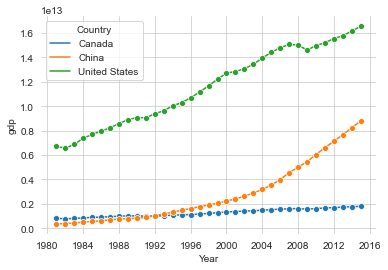

In [227]:
#plot data: https://medium.com/python-in-plain-english/preprocessing-gdp-data-from-world-bank-and-visualize-the-trend-simple-tutorial-of-unpivoting-34ed5db9909b
#fig = plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.lineplot(x='Year', y= 'gdp', hue='Country', data= GDP_sample, marker ='o')
#plt.legend(bbox_to_anchor=(1.04,1))
sns.despine(left = True, bottom= True)

# As it's observerd, USA witnessed an almost increase in it's gdp, China started to rapidly increase in 2000, and canada had an almost constant gdo during the selected period

In [24]:
GDP_long.isnull().sum()
#almost 1 third (4161 / 14784  = 0.28) of the population column contains null values

Country Name         0
Country Code         0
Indicator Name       0
Indicator Code       0
Year                 0
gdp               4161
dtype: int64

In [25]:
#handle nulls
GDP.dropna(axis = 0, inplace= True)
#almost 1 third (4161 / 14784  = 0.28) of the population column contains null values
GDP.reset_index(inplace= True)

In [26]:
GDP.isnull().sum()

index             0
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
                 ..
2011              0
2012              0
2013              0
2014              0
2015              0
Length: 61, dtype: int64

In [27]:
#rename countries
GDP['Country Name'] = GDP['Country Name'].str.replace("Korea, Rep.", "South Korea")
GDP['Country Name'] = GDP['Country Name'].str.replace("Iran, Islamic Rep.", "Iran")
GDP['Country Name'] = GDP['Country Name'].str.replace("Hong Kong SAR, China", "Hong Kong")

In [28]:

[GDP['Country Name'][1:98]]

[1                                               Austria
 2                                               Burundi
 3                                               Belgium
 4                                                 Benin
 5                                          Burkina Faso
                             ...                        
 93                                                 Chad
 94           East Asia & Pacific (IDA & IBRD countries)
 95                                                 Togo
 96                                             Thailand
 97    Latin America & the Caribbean (IDA & IBRD coun...
 Name: Country Name, Length: 97, dtype: object]

In [29]:
GDP.head()

,index,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,11,Australia,AUS,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.983395e+11,2.032502e+11,2.059485e+11,2.187430e+11,2.340028e+11,...,1.021939e+12,1.060340e+12,1.099644e+12,1.119654e+12,1.142251e+12,1.169431e+12,1.211913e+12,1.241484e+12,1.272520e+12,1.301251e+12
1,12,Austria,AUT,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,9.223779e+10,9.734590e+10,9.992428e+10,1.040594e+11,1.104324e+11,...,3.782096e+11,3.919065e+11,3.979703e+11,3.828512e+11,3.902351e+11,4.011929e+11,4.042312e+11,4.055298e+11,4.069632e+11,4.104717e+11
2,14,Burundi,BDI,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,5.966083e+08,5.145977e+08,5.612365e+08,5.844459e+08,6.211084e+08,...,1.714698e+09,1.796761e+09,1.887463e+09,1.952928e+09,2.026864e+09,2.111823e+09,2.196705e+09,2.297623e+09,2.404713e+09,2.343733e+09
3,15,Belgium,BEL,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.205638e+11,1.265660e+11,1.331626e+11,1.389573e+11,1.486241e+11,...,4.626081e+11,4.783251e+11,4.818987e+11,4.708879e+11,4.835775e+11,4.922666e+11,4.930476e+11,4.930627e+11,4.994502e+11,5.063123e+11
4,16,Benin,BEN,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.265426e+09,1.305177e+09,1.260456e+09,1.320076e+09,1.407871e+09,...,6.000596e+09,6.359822e+09,6.671034e+09,6.825750e+09,6.970241e+09,7.176752e+09,7.509970e+09,8.026581e+09,8.551638e+09,8.999782e+09


### Step 2
Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

In [30]:
ScimEn = pd.read_excel('data/scimagojr-3.xlsx')

### Step 3
Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This step should yeild a DataFrame with 20 columns and 15 entries.*

In [35]:
#ScimEn_copy = ScimEn.head(15)

In [36]:
#ScimEn_copy

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
5,6,Canada,17899,17620,215003,40930,12.01,149
6,7,Germany,17027,16831,140566,27426,8.26,126
7,8,India,15005,14841,128763,37209,8.58,115
8,9,France,13153,12973,130632,28601,9.93,114
9,10,South Korea,11983,11923,114675,22595,9.57,104


In [31]:
result = pd.merge(ScimEn, energy, on='Country')
result.head()

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable
0,1,China,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.75491
1,2,United States,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.57098
2,3,Japan,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.23282
3,4,United Kingdom,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.60047
4,5,Russian Federation,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.28868


In [36]:
GDP = GDP.rename(columns = {'Country Name' : 'Country'})
result_ = pd.merge(result, GDP[['Country','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']], 
                   on= 'Country')
#result_.drop('Country', axis=1, inplace=True)
result_.set_index('Country', inplace=True)

In [37]:
result_ = result_.head(15)
#result_.reset_index(inplace=True)
result_

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,2.279353,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12
Italy,11,10964,10794,111850,26661,10.20,106,6.530000e+09,109.0,33.667230,2.202170e+12,2.234627e+12,2.211154e+12,2.089938e+12,2.125185e+12,2.137439e+12,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12


In [38]:
result_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, China to Netherlands
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rank                      15 non-null     int64  
 1   Documents                 15 non-null     int64  
 2   Citable documents         15 non-null     int64  
 3   Citations                 15 non-null     int64  
 4   Self-citations            15 non-null     int64  
 5   Citations per document    15 non-null     float64
 6   H index                   15 non-null     int64  
 7   Energy Supply             15 non-null     float64
 8   Energy Supply per Capita  15 non-null     float64
 9   % Renewable               15 non-null     float64
 10  2006                      15 non-null     float64
 11  2007                      15 non-null     float64
 12  2008                      15 non-null     float64
 13  2009                      15 non-null     float64
 14  2010

### Step 4
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This step should yield a single number.*

Answer: 60

### Step 5

#### Answer the following questions in the context of only the top 15 countries by Scimagojr Rank 


What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This step should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [45]:
#first convert into long format
result_long = result_.melt(ignore_index=False, id_vars = [ 'Rank', 'Documents', 'Citable documents', 	'Citations', 'Self-citations'
                              ,'Citations per document','H index',	'Energy Supply', 'Energy Supply per Capita', '% Renewable']
                   , var_name = 'Year', value_name = 'GDP')

result_long

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,Year,GDP
Country,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,2006,3.992331e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,2006,1.479230e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,2006,5.496542e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2006,2.419631e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,2006,1.564469e+12
...,...,...,...,...,...,...,...,...,...,...,...,...
Australia,14,8831,8725,90765,15606,10.28,107,5.386000e+09,231.0,11.810810,2015,1.301251e+12
Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59.0,69.648030,2015,2.319423e+12
Turkey,17,5879,5827,91857,23165,15.62,104,4.897000e+09,64.0,28.536690,2015,9.065849e+11


In [46]:

# the average GDP over the last 10 years for each country
avgGDP = result_long.groupby('Country').mean()["GDP"]
avgGDP.sort_values(ascending= False)

Country
United States     1.536434e+13
China             6.348609e+12
Japan             5.542208e+12
France            2.681725e+12
United Kingdom    2.487907e+12
Brazil            2.189794e+12
Italy             2.120175e+12
India             1.769297e+12
Canada            1.660647e+12
Spain             1.418078e+12
Australia         1.164043e+12
South Korea       1.106715e+12
Netherlands       8.411181e+11
Turkey            7.704245e+11
Norway            4.389348e+11
Name: GDP, dtype: float64

### Step  6
What is the mean `Energy Supply per Capita`?

*This step should return a single number.*

In [47]:
result_['Energy Supply per Capita'].mean()

159.53333333333333

### Step 7
What country has the maximum % Renewable and what is the percentage?

*This step should return a tuple with the name of the country and the percentage.*

In [51]:
result_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, China to Netherlands
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rank                      15 non-null     int64  
 1   Documents                 15 non-null     int64  
 2   Citable documents         15 non-null     int64  
 3   Citations                 15 non-null     int64  
 4   Self-citations            15 non-null     int64  
 5   Citations per document    15 non-null     float64
 6   H index                   15 non-null     int64  
 7   Energy Supply             15 non-null     float64
 8   Energy Supply per Capita  15 non-null     float64
 9   % Renewable               15 non-null     float64
 10  2006                      15 non-null     float64
 11  2007                      15 non-null     float64
 12  2008                      15 non-null     float64
 13  2009                      15 non-null     float64
 14  2010

In [58]:
result_['% Renewable'].max()

97.63558

In [59]:
#idxmax() returns index(=Country, since we're using Country as an index) of the maximum % Renewable 
max_perc = result_['% Renewable'].idxmax(), result_['% Renewable'].max()
max_perc

('Norway', 97.63558)

### Step 8
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This step should return a tuple with the name of the country and the ratio.*

In [61]:
result_['citations_ratio'] = result_['Self-citations'] / result_['Citations']
max_ratio = result_['citations_ratio'].idxmax(), result_['citations_ratio'].max()
max_ratio

('China', 0.6893126179389422)

### Step 9
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This step should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [62]:
result_['% Renewable'].median()

17.02028

In [63]:
renewable_median = result_['% Renewable'].median()
result_['Renewable_GT_median'] = result_['% Renewable'].apply(lambda x : 1 if (x > renewable_median) else 0)
result_.tail()


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2008,2009,2010,2011,2012,2013,2014,2015,citations_ratio,Renewable_GT_median
Country,,,,,,,,,,,,,,,,,,,,,
Australia,14,8831,8725,90765,15606,10.28,107,5.386000e+09,231.0,11.810810,...,1.099644e+12,1.119654e+12,1.142251e+12,1.169431e+12,1.211913e+12,1.241484e+12,1.272520e+12,1.301251e+12,0.171939,0
Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59.0,69.648030,...,2.056809e+12,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12,0.237159,1
Turkey,17,5879,5827,91857,23165,15.62,104,4.897000e+09,64.0,28.536690,...,7.037962e+11,6.698319e+11,7.311681e+11,7.953116e+11,8.122315e+11,8.462844e+11,8.718432e+11,9.065849e+11,0.252185,1
Norway,18,5675,5634,32693,6024,5.76,74,1.388000e+09,273.0,97.635580,...,4.329860e+11,4.259607e+11,4.285247e+11,4.326762e+11,4.445694e+11,4.490094e+11,4.589539e+11,4.662883e+11,0.184260,1
Netherlands,19,5170,5105,48351,6067,9.35,85,3.199000e+09,190.0,6.324659,...,8.571640e+11,8.248696e+11,8.364397e+11,8.503550e+11,8.413664e+11,8.371985e+11,8.456636e+11,8.624973e+11,0.125478,0


### Step 10
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [87]:
a = GDP_long.groupby('Country Name').sum()
#avgGDP = result_long.groupby('Country').mean()["GDP"]

pandas.core.frame.DataFrame

In [81]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
ContinentDict_ = {'Country' : list(ContinentDict.keys()), 'Continent': list(ContinentDict.values())}
    
summary_df = pd.DataFrame(ContinentDict_)
continent_counts = summary_df['Continent'].value_counts()
#size (the number of countries in each continent bin)
summary_df['size'] = summary_df['Continent'].apply(lambda x: continent_counts[x])

#population sum
pop_sum = GDP_long.groupby('Country Name').sum()
summary_df['sum'] =  summary_df['Country'].apply(lambda x: pop_sum[x])
#result_long: groupby(index)
summary_df

KeyError: 'China'